## Imports

In [93]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers


from sklearn.model_selection import KFold

import tensorflow as tf
import random

import random

## Récupérer les données

In [94]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


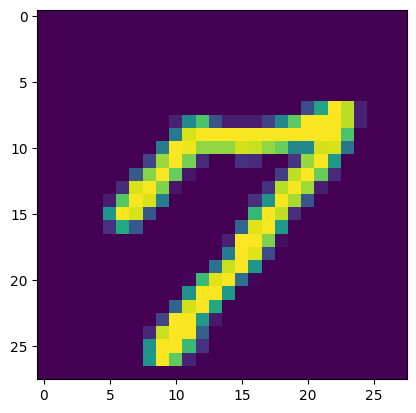

In [95]:
image_index = random.randint(0,train_images.shape[0])
plt.imshow(train_images[image_index])
plt.show()


Les images du dataset sont en fait des matrices avec 255 données. Chaque données sont un chiffre de 0 a 9.
<br>
On les normalise ensuite avec la fonction "normalize" qui est utile pour normaliser les données entre 0 et 1
<br>
De plus on utilisers l'encodage one-hot pour nos labels. Le labbel [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] nous indique que notre digit est un 8.


In [96]:
train_images = tf.keras.utils.normalize(train_images,axis=1)
test_images = tf.keras.utils.normalize(test_images,axis=1)

#Passage en one-hot
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


On peut afficher au hasard une image du dataset d'entrainement avec son label pour observer le résultat.

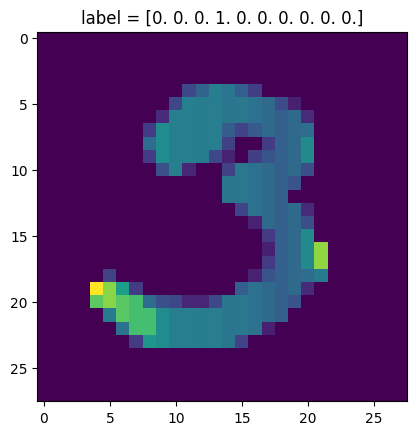

In [97]:
index = random.randint(0,len(train_images)) 
plt.imshow(train_images[index])
plt.title("label = " + str(train_labels[index]))
plt.show()

In [98]:
def createGraph(history,num_of_layer):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Gaph of the model accuracy with ' + str(num_of_layer) + ' layers')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train data', 'validation data'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Gaph of the model loss with ' + str(num_of_layer) + ' layers')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train data', 'validation data'], loc='upper right')
    plt.show()

In [99]:
def modelTraining(model,train_data,train_label,validation_data,validation_labels,epochs=3,batch_size=32):
    model.summary()    
    history = model.fit(train_data,train_label,epochs=epochs,batch_size=batch_size,validation_data=(validation_data,validation_labels))
    createGraph(history,len(model.layers)-1)


Hidden layer 1 = 512
Output layer = 10 car 10 possibilitées


In [100]:
model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=(28,28))) #input layer
model1.add(layers.Dense(10, activation='softmax')) #outpout layer
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.7928 - loss: 0.9380 - val_accuracy: 0.9061 - val_loss: 0.3622
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.9037 - loss: 0.3477 - val_accuracy: 0.9129 - val_loss: 0.3146
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.9126 - loss: 0.3102 - val_accuracy: 0.9185 - val_loss: 0.2960


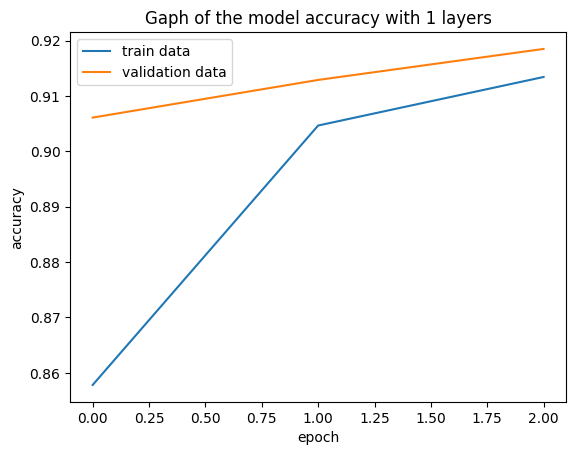

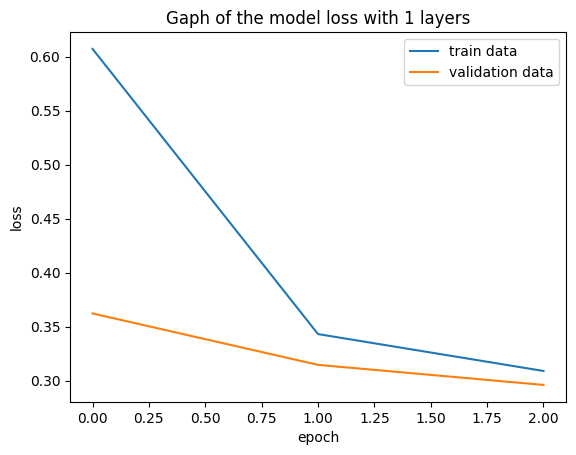

In [101]:
modelTraining(model1,train_images,train_labels,test_images,test_labels)

In [102]:
model2 = models.Sequential()
model2.add(layers.Flatten(input_shape=(28,28))) #input layer
model2.add(layers.Dense(128,activation='relu')) #hidden layer
model2.add(layers.Dense(10, activation='softmax')) #outpout layer
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8662 - loss: 0.5115 - val_accuracy: 0.9469 - val_loss: 0.1835
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9547 - loss: 0.1543 - val_accuracy: 0.9628 - val_loss: 0.1265
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9709 - loss: 0.0986 - val_accuracy: 0.9644 - val_loss: 0.1127


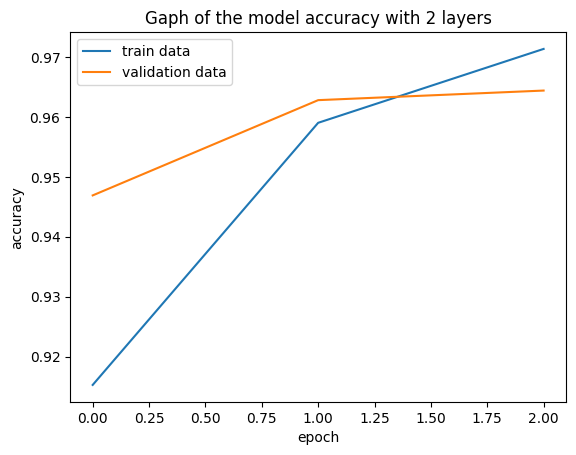

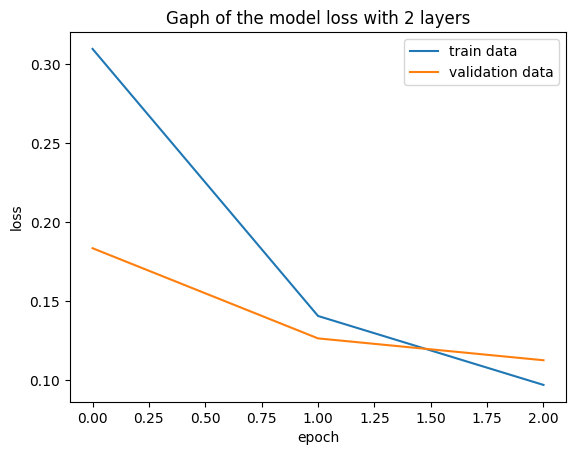

In [103]:
modelTraining(model2,train_images,train_labels,test_images,test_labels)

In [104]:
model3 = models.Sequential()
model3.add(layers.Flatten(input_shape=(28,28))) #input layer
model3.add(layers.Dense(128,activation='relu')) #hidden layer
model3.add(layers.Dense(128,activation='relu')) #hidden layer
model3.add(layers.Dense(10, activation='softmax')) #outpout layer
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8718 - loss: 0.4607 - val_accuracy: 0.9590 - val_loss: 0.1425
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9656 - loss: 0.1150 - val_accuracy: 0.9668 - val_loss: 0.1108
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9770 - loss: 0.0738 - val_accuracy: 0.9682 - val_loss: 0.1038


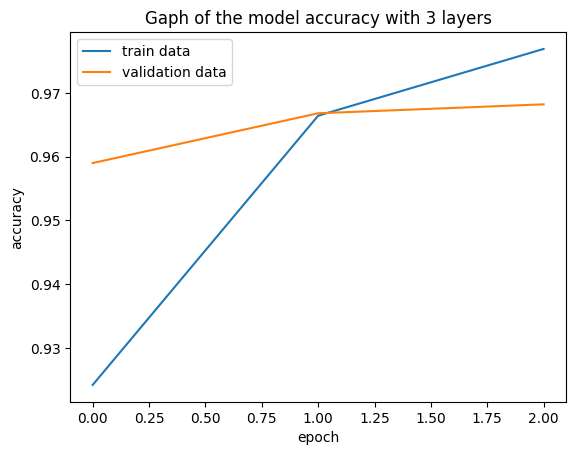

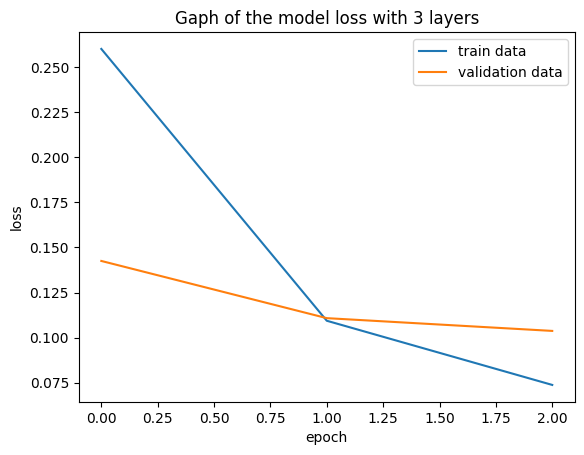

In [105]:
modelTraining(model3,train_images,train_labels,test_images,test_labels)

In [106]:
model4 = models.Sequential()
model4.add(layers.Flatten(input_shape=(28,28))) #input layer
model4.add(layers.Dense(128,activation='relu')) #hidden layer
model4.add(layers.Dense(128,activation='relu')) #hidden layer
model4.add(layers.Dense(128,activation='relu')) #hidden layer
model4.add(layers.Dense(10, activation='softmax')) #outpout layer
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8643 - loss: 0.4510 - val_accuracy: 0.9608 - val_loss: 0.1320
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9663 - loss: 0.1087 - val_accuracy: 0.9685 - val_loss: 0.0985
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9780 - loss: 0.0714 - val_accuracy: 0.9649 - val_loss: 0.1111


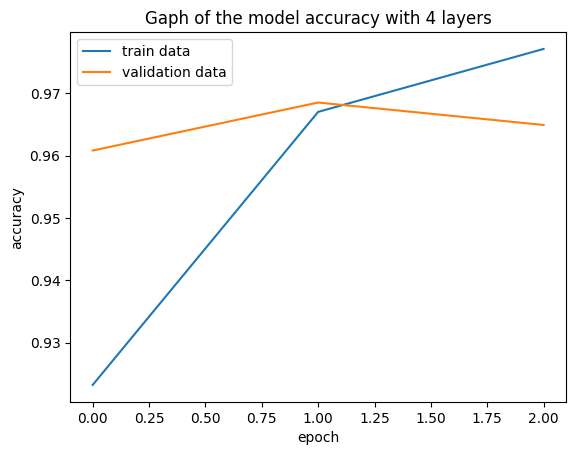

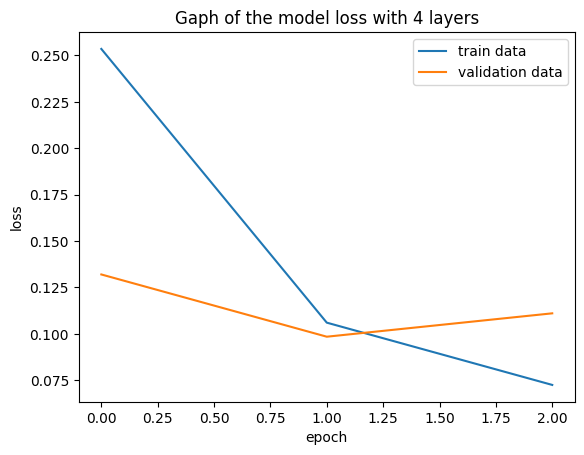

In [107]:
modelTraining(model4,train_images,train_labels,test_images,test_labels)